<a href="https://colab.research.google.com/github/santhosh-sandy007/CodSoft/blob/main/CustomerChrunPredication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
file = pd.read_csv('/content/sample_data/Churn_Modelling.csv')
file.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9809,9810,15763907,Watts,820,France,Female,39,1,104614.29,1,1,0,61538.43,1
2392,2393,15656912,Aitken,649,Spain,Male,51,4,0.00,1,1,1,150390.57,0
9520,9521,15673180,Onyekaozulu,727,Germany,Female,18,2,93816.70,2,1,0,126172.11,0
1683,1684,15709387,Obiajulu,711,France,Male,52,5,0.00,1,1,1,159808.95,0
6242,6243,15673333,Wilson,698,Germany,Male,52,8,96781.39,1,1,1,153373.71,0
7078,7079,15682576,Onyenachiya,763,France,Male,67,1,149436.73,2,0,1,106282.74,0
6047,6048,15790247,Sims,536,Spain,Male,40,9,0.00,2,1,1,11959.03,0
4307,4308,15702499,Schnaars,770,Spain,Male,46,9,190678.02,1,1,1,14725.36,0
3660,3661,15736431,Congreve,494,Spain,Male,27,2,0.00,2,1,0,22404.64,0
5244,5245,15702190,Fan,672,Spain,Male,43,5,0.00,2,1,1,64515.50,0


<Axes: >

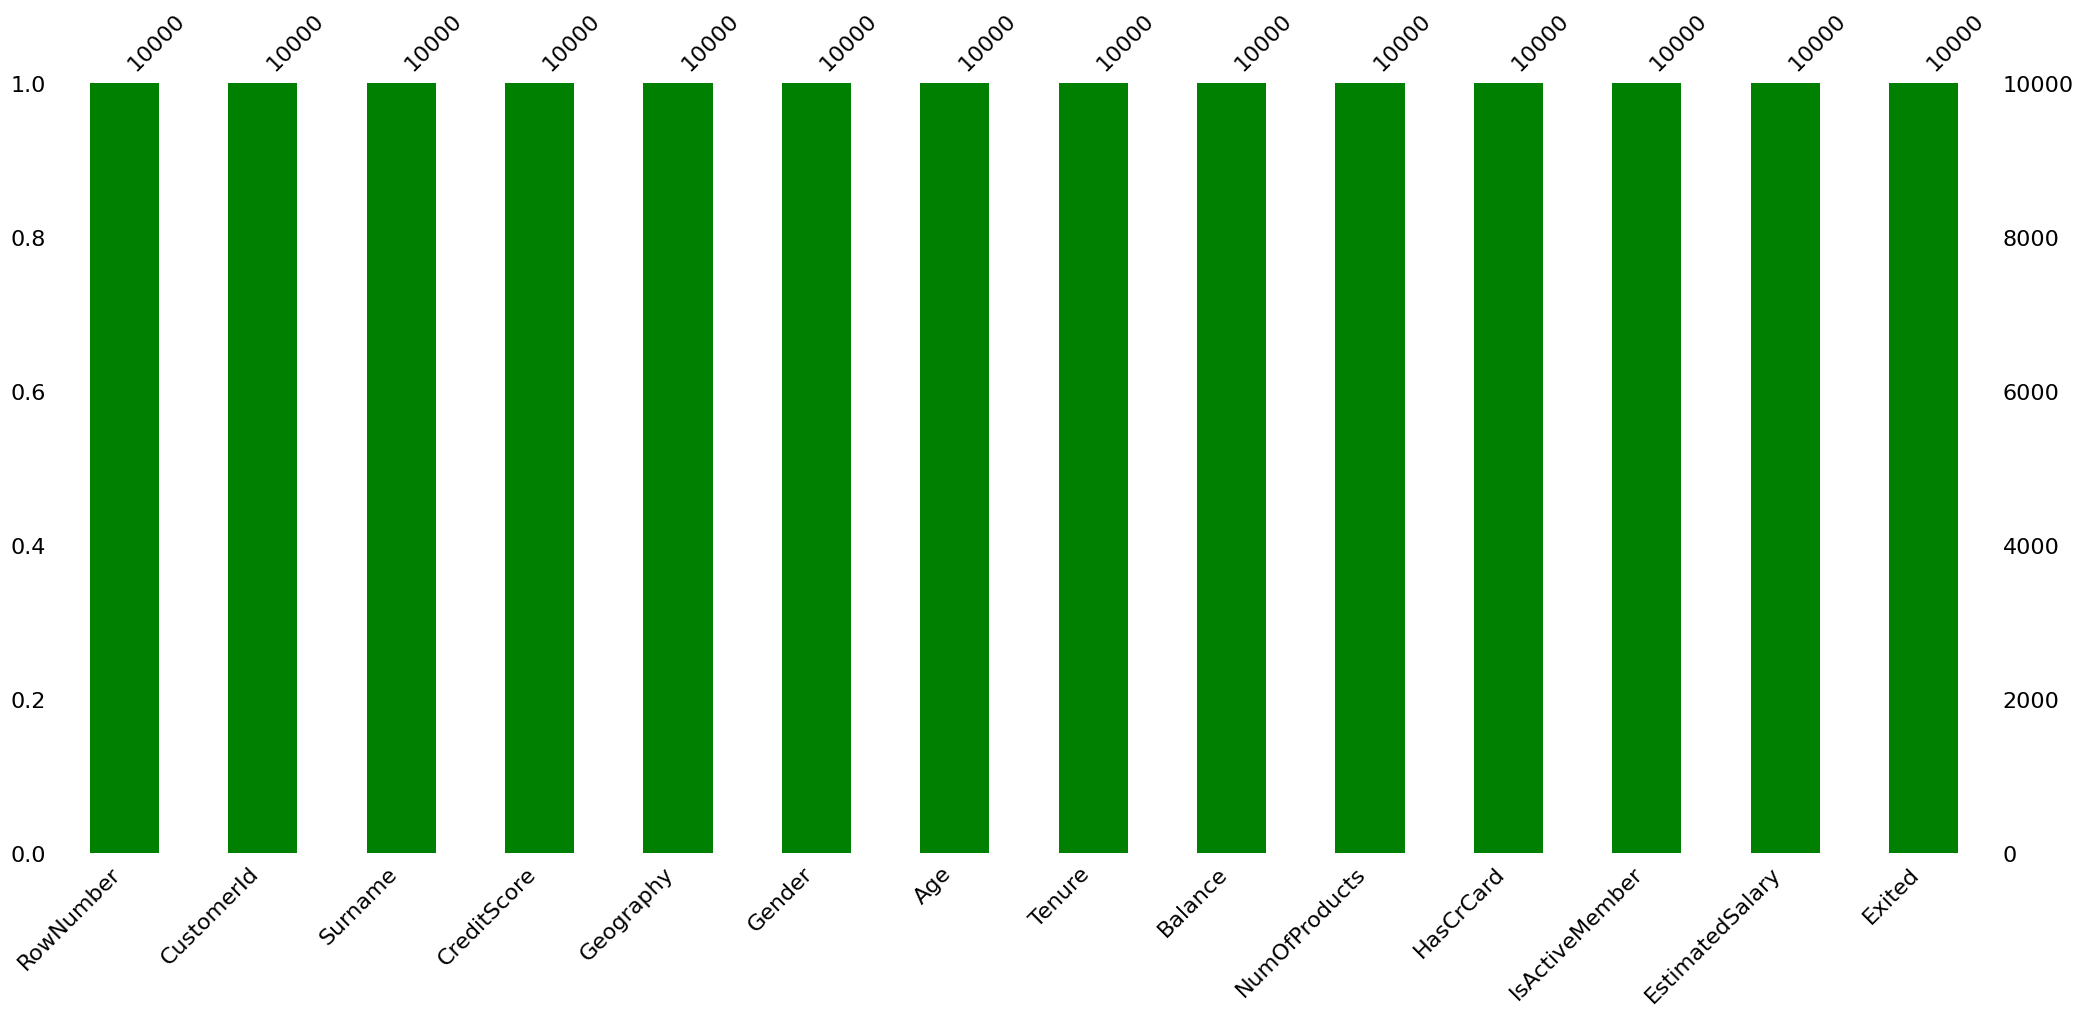

In [ ]:
import missingno as msno
msno.bar(file,color = 'Green')


In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(file)
missing_values.style.background_gradient(cmap='Greens')

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


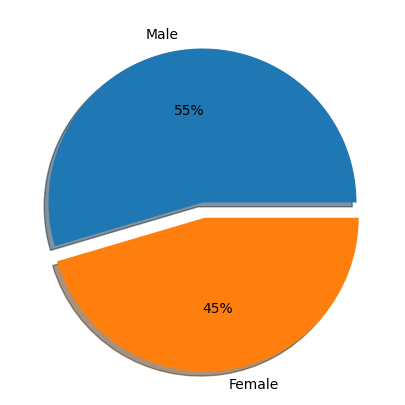

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.pie(file['Gender'].value_counts().values,labels=['Male','Female'],autopct='%.f%%',explode = [0,0.1],shadow = True)
plt.show()

<ipython-input-6-71f73a796297>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x = region['Country'],y = region['Count'],palette='GnBu')


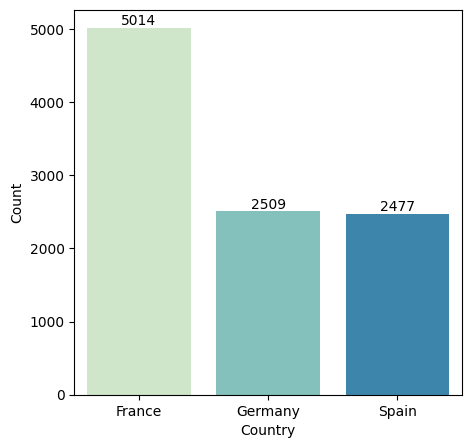

In [ ]:
region = file.Geography.value_counts().to_frame().reset_index()
region.columns = ['Country','Count']

plt.figure(figsize = (5,5))
ax=sns.barplot(x = region['Country'],y = region['Count'],palette='GnBu')
for i in ax.containers:
    ax.bar_label(i,)

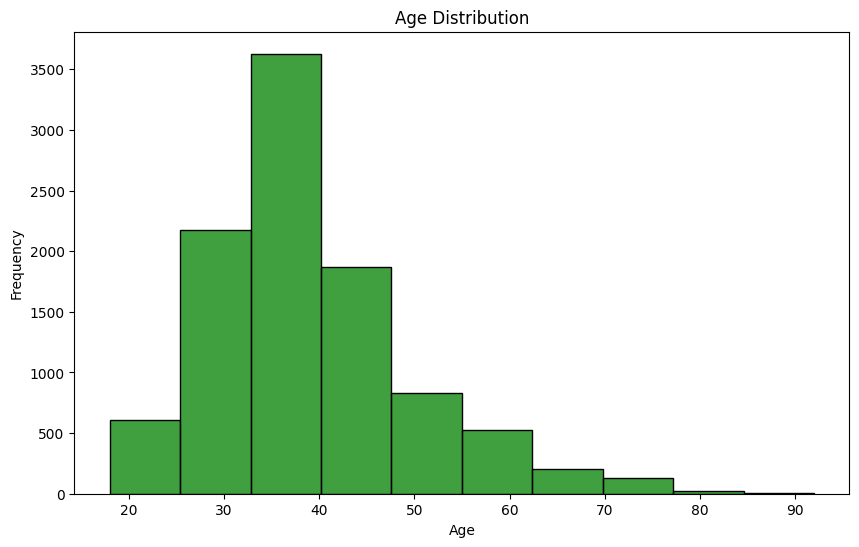

In [ ]:
plt.figure(figsize=(10, 6))

# Create the age distribution plot
ax = sns.histplot(data=file['Age'], bins=10, kde=False,color = 'Green',)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

# Show the plot
plt.show()